### Bagging - Preprocessing todas las variables

La idea de este notebook es entrenar con bagging de árboles con todas las variables del data set. Limitando un poco sus alturas.

##### Bibliotecas

In [1]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Preprocessing
import utils

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

# Otros
import pandas as pd
import numpy as np

In [2]:
df = utils.feature_engineering(utils.get_data())

In [3]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X)
Y = df['tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=27)

In [8]:
arbol = DecisionTreeClassifier(max_depth=25)
bagging = BaggingClassifier(base_estimator=arbol, n_estimators = 5001, n_jobs=-1, random_state=27, verbose=4)

In [9]:
bagging.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:  4.9min remaining: 14.6min
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:  4.9min remaining:  2.9min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  4.9min remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:  4.9min finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=25),
                  n_estimators=5001, n_jobs=-1, random_state=27, verbose=4)

In [10]:
print(classification_report(y_test,bagging.predict(X_test)))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    9.4s remaining:   28.3s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   13.3s remaining:    8.0s


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6186
           1       0.73      0.65      0.69      1955

    accuracy                           0.86      8141
   macro avg       0.81      0.79      0.80      8141
weighted avg       0.85      0.86      0.85      8141



[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   18.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   18.0s finished


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   10.8s remaining:   32.4s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   15.6s remaining:    9.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.6s finished


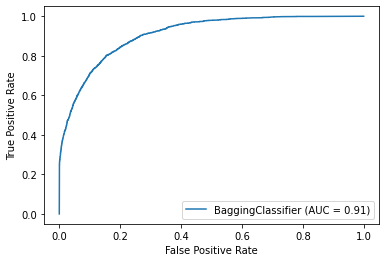

In [11]:
plot_roc_curve(bagging, X_test, y_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    8.5s remaining:   25.5s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   15.3s remaining:    9.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.6s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   17.6s finished


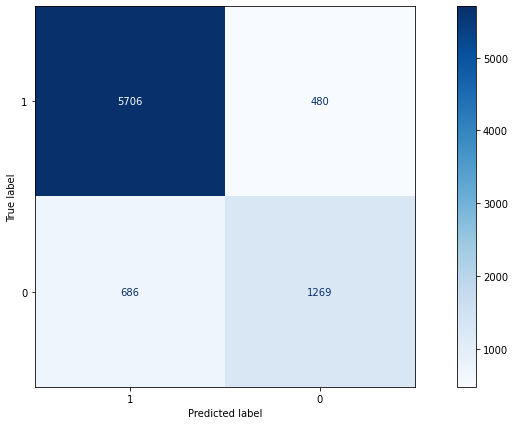

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging, X_test, y_test, cmap=plt.cm.Blues, display_labels=['1', '0'], ax=ax)
plt.show()